Background
You are a senior data analyst at a hotel companyt. The hotel company aims to conduct fine-tuned marketing and operations in order to renovation and experience improvements can be made by classifying users through user profile analysis.

Task
Your task is to analyze the data file I uploaded. Utilize k-means clustering analysis to categorize users based on the provided features. First, assist me in creating a detailed analysis plan, breaking down this problem into smaller steps. Then, I'll provide you with my feedback. Based on my feedback, you can make adjustments until I'm satisfied, and then proceed with the analysis. Execute one step at a time, and when analyzing, include plenty of visualizations.

I'll provide you with two files: "hotel_bookings.csv" contains the data, and "Column_Descriptions_for_Hotel_Bookings.excel" provides descriptions for each column.

I want you perform one by one with my permission and feedback and explain each steps to me to the end. Do you understand?

Help me convert the analysis plan it to Markdown format, I want to paste it into a Jupyter Notebook.

## Analysis Plan for Hotel Booking Data Clustering

### Step 1: Data Loading and Initial Exploration
- Load the data from the provided CSV file and review the first few rows and summary statistics.
- Load the column descriptions from the Excel file to understand the meaning of each column.

### Step 2: Data Cleaning and Preprocessing
- Check for missing values and decide on the handling strategy (e.g., fill in or remove).
- Identify and handle any obvious errors or outliers.
- Convert data types as necessary (e.g., convert date strings to date objects).

### Step 3: Exploratory Data Analysis (EDA)
- Conduct EDA to understand the distributions and relationships of various features.
- Use histograms, scatter plots, and box plots to visualize important characteristics.

### Step 4: Feature Selection and Engineering
- Decide on features for clustering based on EDA insights and column descriptions.
- Create new features if necessary (e.g., derive length of stay from check-in and check-out dates).

### Step 5: Data Normalization
- Normalize the data to ensure all features contribute equally to the k-means distance calculations.

### Step 6: Choosing the Number of Clusters
- Use the elbow method or silhouette analysis to determine an appropriate number of clusters.

### Step 7: Clustering with K-Means
- Apply k-means clustering to the normalized data.
- Analyze cluster characteristics to understand different user profiles.

### Step 8: Evaluation and Interpretation
- Evaluate the clustering results using appropriate metrics.
- Interpret the clusters in terms of marketing and operational strategies.

### Step 9: Visualizing Results
- Visualize the clustering results and feature distributions within clusters.

### Step 10: Reporting and Recommendations
- Compile findings into a report with visualizations and actionable recommendations.


### Step 1: Data Loading and Initial Exploration
- Load the data from the provided CSV file and review the first few rows and summary statistics.
- Load the column descriptions from the Excel file to understand the meaning of each column.

In [8]:
import pandas as pd

# Load the hotel bookings data
hotel_data = pd.read_csv('hotel_bookings.csv')

# Display the first few rows and summary statistics
hotel_data_head = hotel_data.head()
hotel_data_description = hotel_data.describe()

# Load the column descriptions
column_descriptions = pd.read_excel('Column_Descriptions_for_Hotel_Bookings.xlsx')

hotel_data_head, hotel_data_description, column_descriptions


(          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
 0  Resort Hotel            0        342               2015               July   
 1  Resort Hotel            0        737               2015               July   
 2  Resort Hotel            0          7               2015               July   
 3  Resort Hotel            0         13               2015               July   
 4  Resort Hotel            0         14               2015               July   
 
    arrival_date_week_number  arrival_date_day_of_month  \
 0                        27                          1   
 1                        27                          1   
 2                        27                          1   
 3                        27                          1   
 4                        27                          1   
 
    stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
 0                        0                     0       2  ...    No D

### Step 2: Data Cleaning and Preprocessing
- Check for missing values and decide on the handling strategy (e.g., fill in or remove).
- Identify and handle any obvious errors or outliers.
- Convert data types as necessary (e.g., convert date strings to date objects).

In [10]:
# Check for missing values in the dataset
missing_data = hotel_data.isnull().sum().reset_index()
missing_data.columns = ['Column', 'Missing Values']
missing_data = missing_data[missing_data['Missing Values'] > 0]

missing_data


,Column,Missing Values
10,children,4
13,country,488
23,agent,16340
24,company,112593


In [12]:
import numpy as np

# Handling missing values
hotel_data['children'].fillna(hotel_data['children'].mode()[0], inplace=True)
hotel_data['country'].fillna('Unknown', inplace=True)
hotel_data['agent'].fillna('None', inplace=True)
hotel_data['company'].fillna('None', inplace=True)

# Identify outliers using IQR for numerical columns
def detect_outliers(data, features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = list(set(outlier_indices))
    return outlier_indices

# Applying outlier detection
numerical_features = ['lead_time', 'adr', 'adults', 'children', 'babies']
outliers = detect_outliers(hotel_data, numerical_features)
outlier_data = hotel_data.loc[outliers]

outlier_data_summary = outlier_data[numerical_features].describe()

outlier_data_summary


C:\Users\User\AppData\Local\Temp\ipykernel_8352\1456594427.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hotel_data['agent'].fillna('None', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8352\1456594427.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hotel_data['company'].fillna('None', inplace=True)


,lead_time,adr,adults,children,babies
count,41958.000000,41958.000000,41958.000000,41958.000000,41958.000000
mean,99.520044,112.672316,1.591401,0.295605,0.022618
std,124.338012,67.798477,0.920059,0.628748,0.163349
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,66.000000,1.000000,0.000000,0.000000
50%,49.000000,100.000000,1.000000,0.000000,0.000000
75%,145.000000,148.000000,2.000000,0.000000,0.000000
max,737.000000,5400.000000,55.000000,10.000000,10.000000


In [14]:
# Handling outliers based on discussed strategy
# Capping the ADR at 1000 and considering more than 10 adults as potential data errors
hotel_data['adr'] = np.where(hotel_data['adr'] > 1000, 1000, hotel_data['adr'])
hotel_data = hotel_data[hotel_data['adults'] <= 10]

# Convert date-related fields to datetime format (if not already)
date_columns = ['reservation_status_date']
for col in date_columns:
    hotel_data[col] = pd.to_datetime(hotel_data[col], errors='coerce')

# Re-check the data types and ensure all adjustments are in place
data_types = hotel_data.dtypes
missing_data_post_cleaning = hotel_data.isnull().sum().reset_index()
missing_data_post_cleaning.columns = ['Column', 'Missing Values']
missing_data_post_cleaning = missing_data_post_cleaning[missing_data_post_cleaning['Missing Values'] > 0]

data_types, missing_data_post_cleaning


(hotel                                     object
 is_canceled                                int64
 lead_time                                  int64
 arrival_date_year                          int64
 arrival_date_month                        object
 arrival_date_week_number                   int64
 arrival_date_day_of_month                  int64
 stays_in_weekend_nights                    int64
 stays_in_week_nights                       int64
 adults                                     int64
 children                                 float64
 babies                                     int64
 meal                                      object
 country                                   object
 market_segment                            object
 distribution_channel                      object
 is_repeated_guest                          int64
 previous_cancellations                     int64
 previous_bookings_not_canceled             int64
 reserved_room_type                        object


### Step 3: Exploratory Data Analysis (EDA)
- Conduct EDA to understand the distributions and relationships of various features.
- Use histograms, scatter plots, and box plots to visualize important characteristics.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


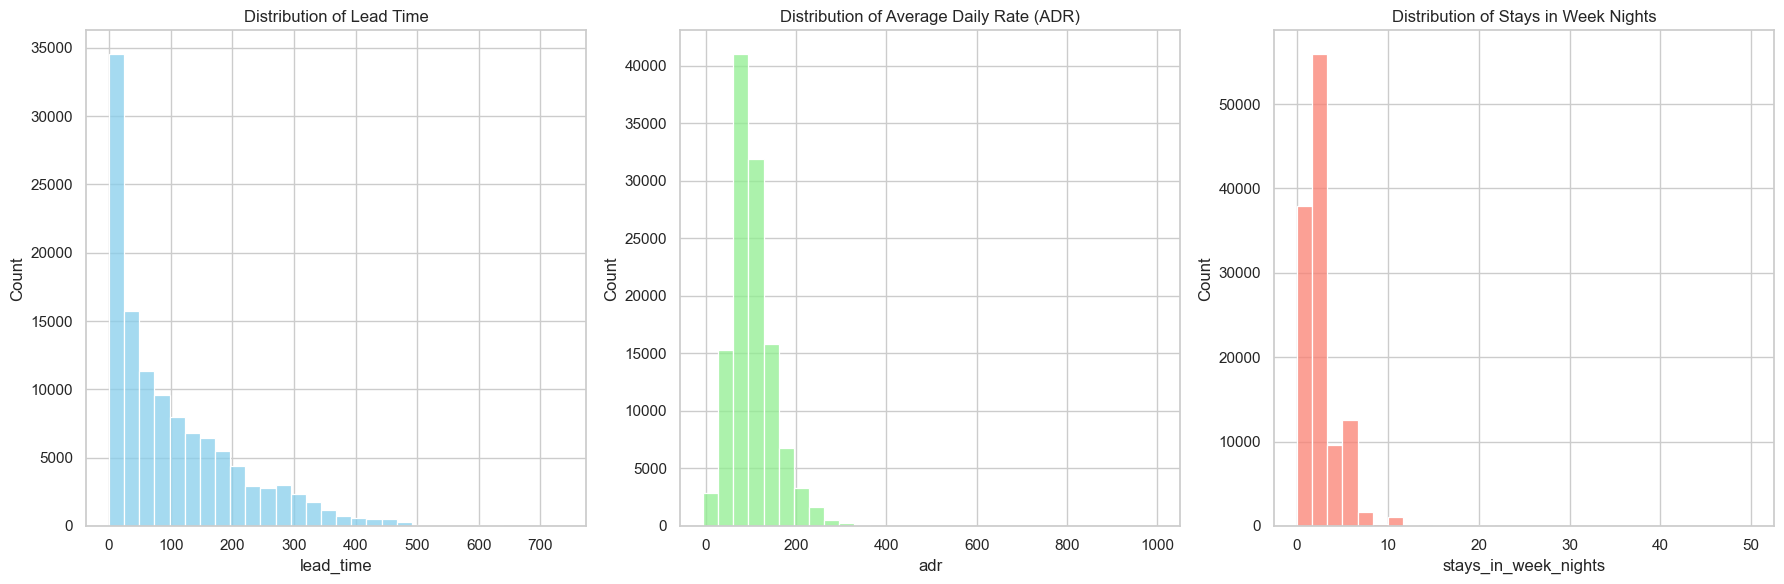

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for plots
sns.set(style="whitegrid")

# Creating histograms for key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(hotel_data['lead_time'], bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Lead Time')

sns.histplot(hotel_data['adr'], bins=30, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Average Daily Rate (ADR)')

sns.histplot(hotel_data['stays_in_week_nights'], bins=30, ax=axes[2], color='salmon')
axes[2].set_title('Distribution of Stays in Week Nights')

plt.tight_layout()
plt.show()


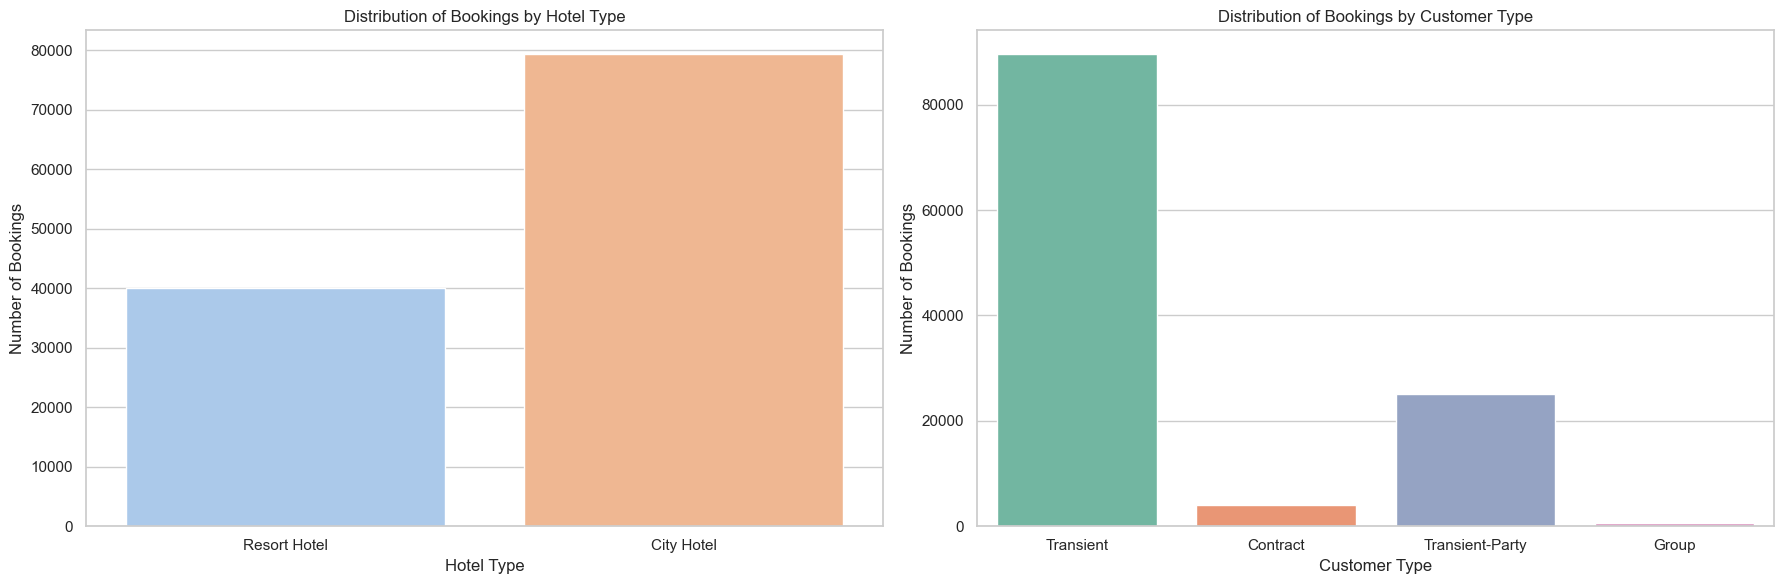

In [18]:
# Creating bar plots for categorical data distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x='hotel', data=hotel_data, ax=axes[0], palette='pastel')
axes[0].set_title('Distribution of Bookings by Hotel Type')
axes[0].set_xlabel('Hotel Type')
axes[0].set_ylabel('Number of Bookings')

sns.countplot(x='customer_type', data=hotel_data, ax=axes[1], palette='Set2')
axes[1].set_title('Distribution of Bookings by Customer Type')
axes[1].set_xlabel('Customer Type')
axes[1].set_ylabel('Number of Bookings')

plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


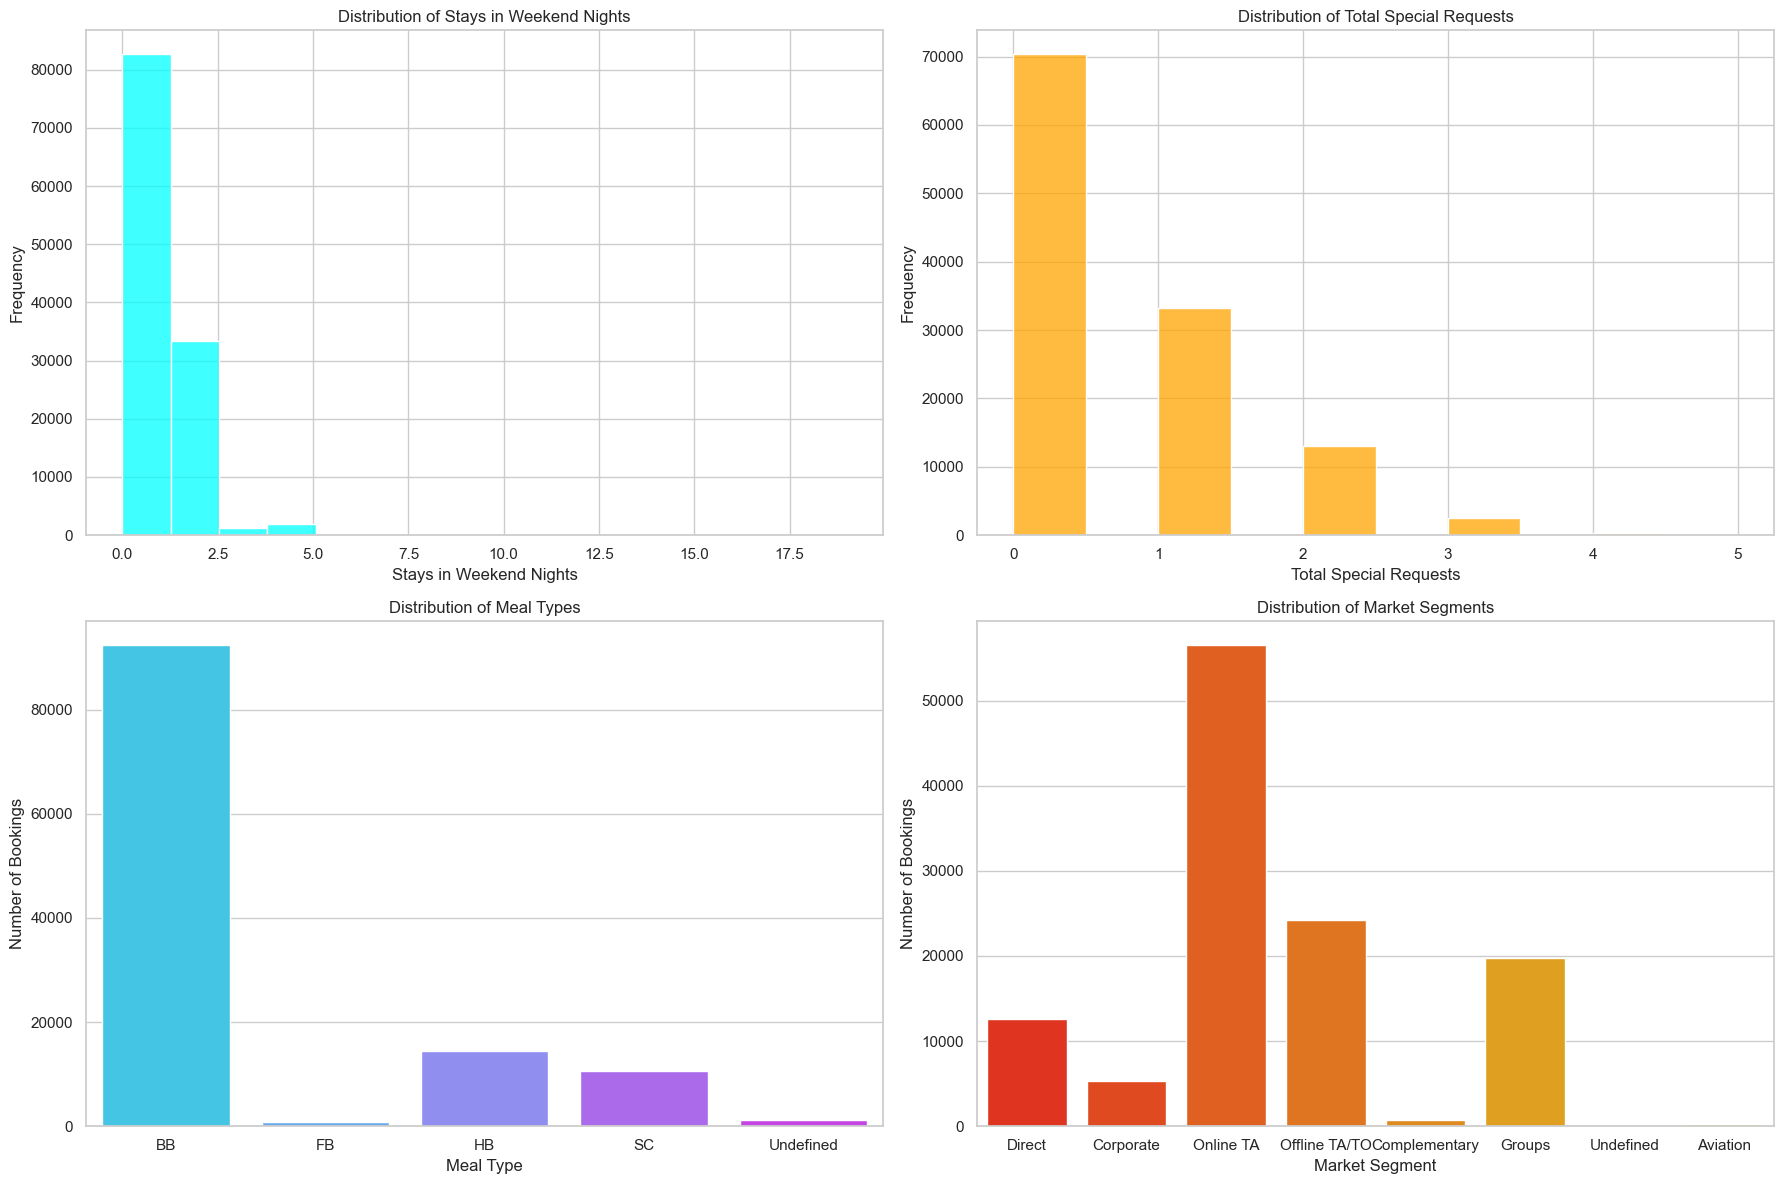

In [20]:
# Creating visualizations for additional numerical and categorical variables
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Histograms for numerical variables
sns.histplot(hotel_data['stays_in_weekend_nights'], bins=15, ax=axes[0, 0], color='cyan')
axes[0, 0].set_title('Distribution of Stays in Weekend Nights')
axes[0, 0].set_xlabel('Stays in Weekend Nights')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(hotel_data['total_of_special_requests'], bins=10, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Distribution of Total Special Requests')
axes[0, 1].set_xlabel('Total Special Requests')
axes[0, 1].set_ylabel('Frequency')

# Bar plots for categorical variables
sns.countplot(x='meal', data=hotel_data, ax=axes[1, 0], palette='cool')
axes[1, 0].set_title('Distribution of Meal Types')
axes[1, 0].set_xlabel('Meal Type')
axes[1, 0].set_ylabel('Number of Bookings')

sns.countplot(x='market_segment', data=hotel_data, ax=axes[1, 1], palette='autumn')
axes[1, 1].set_title('Distribution of Market Segments')
axes[1, 1].set_xlabel('Market Segment')
axes[1, 1].set_ylabel('Number of Bookings')

plt.tight_layout()
plt.show()


### Step 4: Feature Selection and Engineering
- Decide on features for clustering based on EDA insights and column descriptions.
- Create new features if necessary (e.g., derive length of stay from check-in and check-out dates).

In [22]:
# Feature Engineering: Creating 'Total Stay'
hotel_data['total_stay'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']

# Selecting relevant features
selected_features = ['lead_time', 'adr', 'total_stay', 'total_of_special_requests',
                     'hotel', 'customer_type', 'meal', 'market_segment']

# Preparing the dataset for clustering: encoding categorical variables
hotel_data_prepared = pd.get_dummies(hotel_data[selected_features], drop_first=True)

# Display the first few rows of the prepared dataset
hotel_data_prepared.head()


,lead_time,adr,total_stay,total_of_special_requests,hotel_Resort Hotel,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined
0,342,0.0,0,0,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,737,0.0,0,0,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,7,75.0,1,0,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,13,75.0,1,0,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False
4,14,98.0,2,1,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False


### Step 5: Data Normalization
- Normalize the data to ensure all features contribute equally to the k-means distance calculations.

In [24]:
from sklearn.preprocessing import StandardScaler

# Selecting the finalized features
features = ['lead_time', 'adr', 'total_stay', 'hotel', 'customer_type', 'market_segment', 
            'adults', 'children', 'distribution_channel', 'is_repeated_guest', 
            'previous_cancellations', 'previous_bookings_not_canceled', 
            'reserved_room_type', 'assigned_room_type', 'meal']

# Preparing the dataset with the selected features
hotel_data_selected = hotel_data[features]

# Encoding categorical variables
hotel_data_encoded = pd.get_dummies(hotel_data_selected, drop_first=True)

# Normalizing numerical features
scaler = StandardScaler()
numerical_features = ['lead_time', 'adr', 'total_stay', 'adults', 'children', 
                      'previous_cancellations', 'previous_bookings_not_canceled']
hotel_data_encoded[numerical_features] = scaler.fit_transform(hotel_data_encoded[numerical_features])

# Display the first few rows of the normalized dataset
hotel_data_encoded.head()


,lead_time,adr,total_stay,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,hotel_Resort Hotel,customer_type_Group,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,meal_FB,meal_HB,meal_SC,meal_Undefined
0,2.227707,-2.111474,-1.340304,0.299179,-0.260673,0,-0.103185,-0.091559,True,False,...,False,False,False,False,False,False,False,False,False,False
1,5.924762,-2.111474,-1.340304,0.299179,-0.260673,0,-0.103185,-0.091559,True,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.907770,-0.555938,-0.949283,-1.742985,-0.260673,0,-0.103185,-0.091559,True,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.851612,-0.555938,-0.949283,-1.742985,-0.260673,0,-0.103185,-0.091559,True,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.842252,-0.078907,-0.558261,0.299179,-0.260673,0,-0.103185,-0.091559,True,False,...,False,False,False,False,False,False,False,False,False,False


### Step 6: Choosing the Number of Clusters
- Use the elbow method or silhouette analysis to determine an appropriate number of clusters.

### Step 7: Clustering with K-Means
- Apply k-means clustering to the normalized data.
- Analyze cluster characteristics to understand different user profiles.

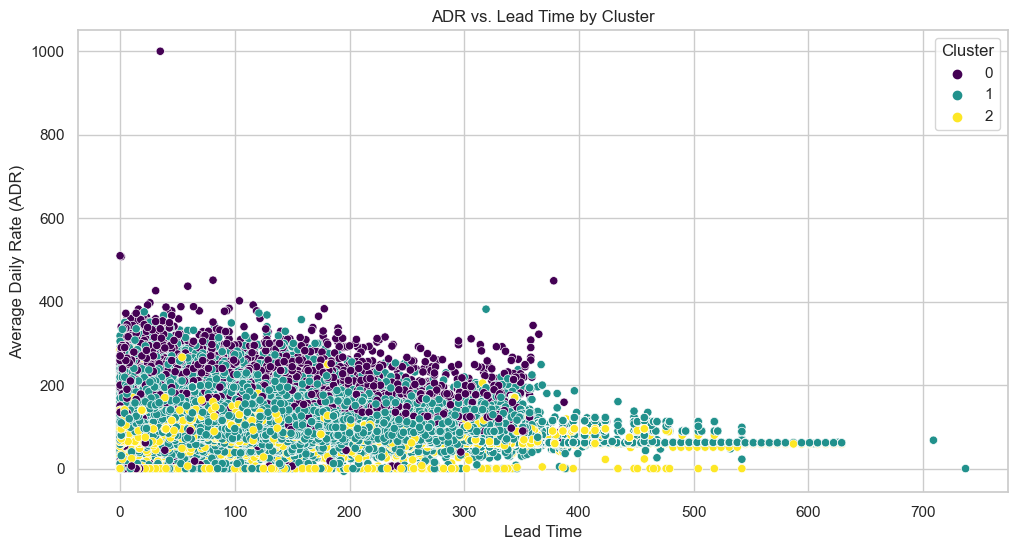

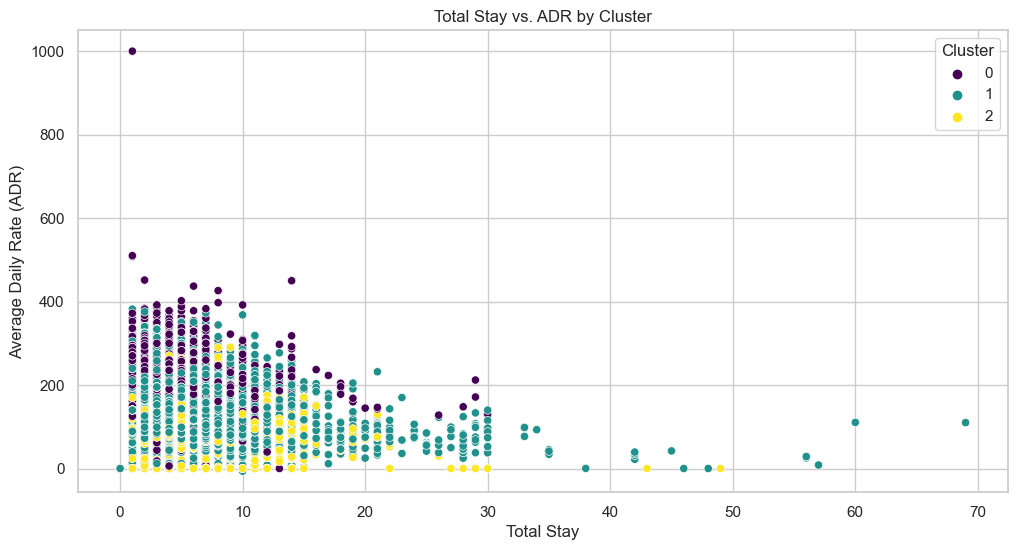

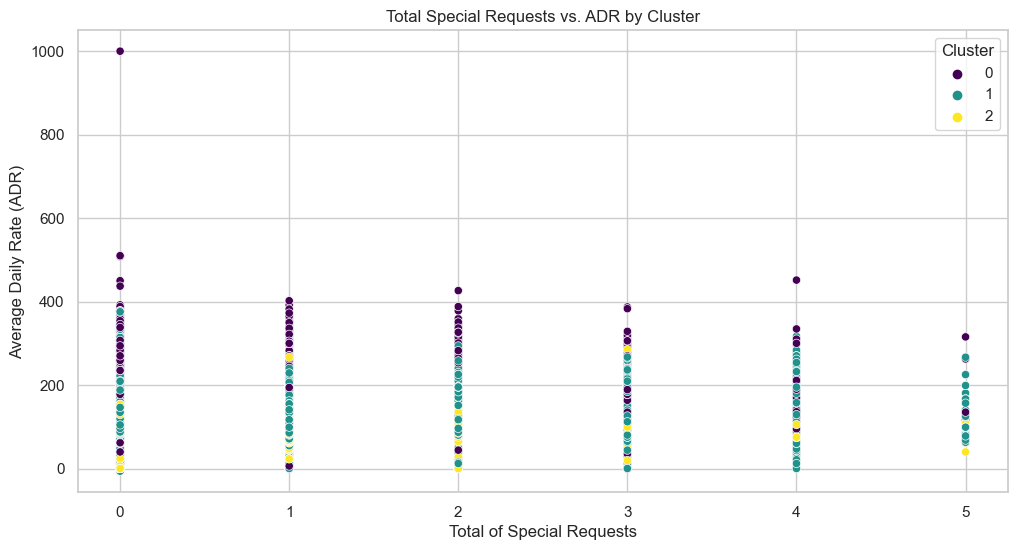

In [36]:
# Visualizing the clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting ADR against Lead Time colored by Cluster
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hotel_data, x='lead_time', y='adr', hue='Cluster', palette='viridis')
plt.title('ADR vs. Lead Time by Cluster')
plt.xlabel('Lead Time')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Cluster')
plt.show()

# Plotting Total Stay against ADR colored by Cluster
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hotel_data, x='total_stay', y='adr', hue='Cluster', palette='viridis')
plt.title('Total Stay vs. ADR by Cluster')
plt.xlabel('Total Stay')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Cluster')
plt.show()

# Plotting Total of Special Requests against ADR colored by Cluster
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hotel_data, x='total_of_special_requests', y='adr', hue='Cluster', palette='viridis')
plt.title('Total Special Requests vs. ADR by Cluster')
plt.xlabel('Total of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Cluster')
plt.show()


### Step 8: Evaluation and Interpretation
- Evaluate the clustering results using appropriate metrics.
- Interpret the clusters in terms of marketing and operational strategies.

In [38]:
from sklearn.metrics import silhouette_score

# Calculating Inertia (WCSS)
inertia = kmeans.inertia_

# Calculating Silhouette Score
silhouette_avg = silhouette_score(hotel_data_encoded, cluster_labels)

inertia, silhouette_avg


(891410.7997204064, 0.2134318662917587)

### Step 9: Visualizing Results
- Visualize the clustering results and feature distributions within clusters.

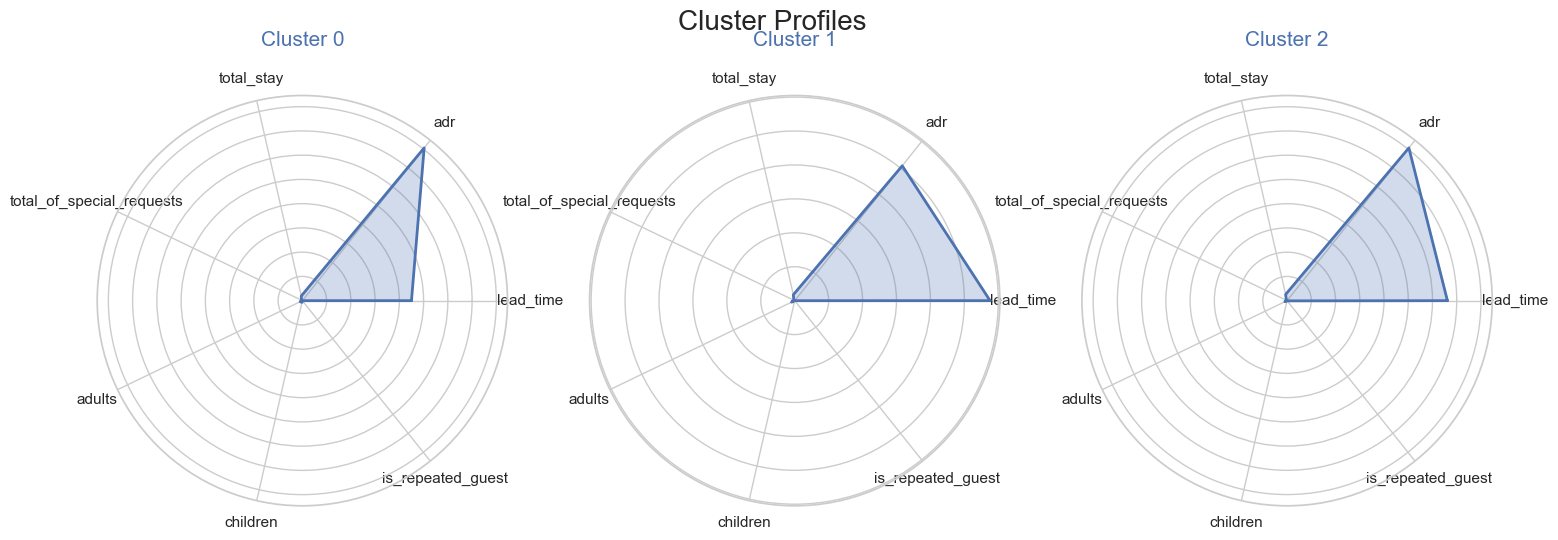

In [42]:
# Redefining the key features
key_features = ['lead_time', 'adr', 'total_stay', 'total_of_special_requests', 'adults', 'children', 'is_repeated_guest']

# Preparing data for radar charts
cluster_means = hotel_data.groupby('Cluster')[key_features].mean()

# Function to create radar chart
def create_radar_chart(data, features, cluster_id, ax):
    # Number of variables
    categories = features
    N = len(categories)
    
    # What will be the angle of each axis in the plot
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    
    # The plot is a circle, so we need to "complete the loop"
    data += data[:1]
    angles += angles[:1]
    
    # Draw the radar chart
    ax.fill(angles, data, color='b', alpha=0.25)
    ax.plot(angles, data, color='b', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(f'Cluster {cluster_id}', size=15, color='b', y=1.1)

# Creating radar charts for each cluster
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))
fig.suptitle('Cluster Profiles', size=20)

for i in range(3):
    cluster_data = cluster_means.iloc[i].tolist()
    create_radar_chart(cluster_data, key_features, i, axs[i])

plt.show()


### Step 10: Reporting and Recommendations
- Compile findings into a report with visualizations and actionable recommendations.
